### [1] 머신러닝 기초 강의

In [36]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
weights = [87, 81, 82, 92, 90, 61, 86, 66, 69, 69]
heights = [187, 174, 179, 192, 188, 160, 179, 168, 168, 174]

print(len(weights))
print(len(heights))

10
10


##### 1. 데이터프레임 만들기
리스트로 사용해도 되지만, 판다스에서 제공하는 dataframe을 사용하는게 시각적으로도 좋고 관리하기도 편하다.

In [38]:
# 다양한 방법이 있지만 표현하기 편한 딕셔너리 형태로 데이터로 만들었다.
body_df = pd.DataFrame({
    "weight": weights,
    "height": heights
})

body_df.head(3)

,weight,height
0,87,187
1,81,174
2,82,179


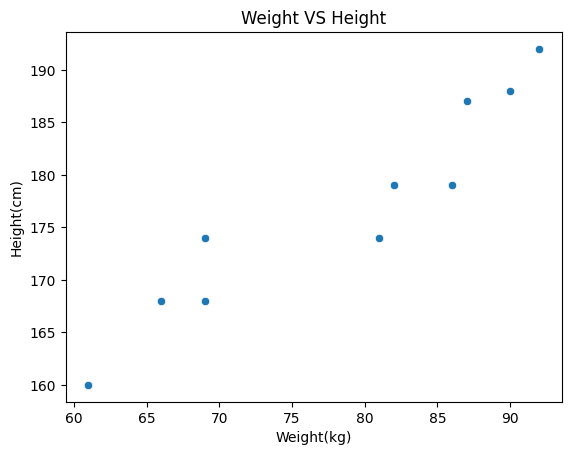

In [39]:
# 이제 시각화를 할 것이다. 쉽게 말해 산점도를 만든다. (sns_scatter plot이 직관적이다.)
sns.scatterplot(data = body_df, x = 'weight', y = 'height')
# sns가 plt을 상속하기 때문에 연관이 있기에 같이 섞어 써도 무방하다.
plt.title('Weight VS Height')
plt.xlabel('Weight(kg)')
plt.ylabel('Height(cm)')
plt.show()

##### 2. 선형회귀 적용
시각화한 두 개가 선형관계가 있음을 확인했고, 선형회귀를 적용할 수 있을거라고 판단됨.

##### 3. 설계도 가져오기

In [40]:
# 선형회귀 훈련(적합), 훈련한다=적합한다, train=fit

from sklearn.linear_model import LinearRegression # 선형 설계도안일 뿐이니 새로운 변수에 할당해야 한다.
model_lr = LinearRegression()

type(model_lr)

sklearn.linear_model._base.LinearRegression

##### 4. 데이터프레임의 이름 변경하기
 + 독립변수(x) = weight, 종속변수(y) = height 이기에 이름을 바꾸도록 한다.
 - 여기서 중요한 것
   - DataFrame [ ] : Series형태 데이터로 가져온다. (데이터 프레임의 컬럼에 대한 역할)
   - DataFrame [ [ ] ] : DataFrame 그대로 잘라서 가져온다.
 - 괄호 두개를 안쓰면 나중에 훈련시킬 때, 사소한 데이터의 차원 문제가 생긴다.
 + 일반적으로 y는 소문자로 사용한다.

In [41]:
x = body_df[['weight']] # Traning data
y = body_df[['height']] # Target value

In [42]:
x.head(3)

,weight
0,87
1,81
2,82


In [43]:
y.head(3)

,height
0,187
1,174
2,179


##### 5. 데이터 훈련시키기

In [45]:
model_lr.fit(x, y) # 튜터님처럼 x=x, y=y하면 버전이 달라서 오류난다. 순서만 맞추면 됨.

LinearRegression()

- 위의 결괏값은 지금 훈련이 잘 되었다는 표시이다.\
우리가 뭘 할거냐면 이제 훈련이 되었으니까 →\
훈련을 바탕으로 새로운 데이터가 들어오면 예측할 수 있다.

- fit이 완료되면 내부의 가중치를 찾는 과정(아직 안배움)을 통해서 model_lr 이라는 곳에 속성(Attributes) 값에다가 가중치 값들을 계산하여 알아서 넣는 것이다. 그 결과 아래처럼 저장이 잘 된 것을 볼 수 있다.
- 데이터 먹은 게 없으면 가중치나 편향값을 실행시켜도 나오는 게 없을 것이다. (당연함)
- 데이터가 들어가면 가중치, 편향도 나오고 방정식도 만들 수 있다.

In [48]:
# 가중치(w1)
print(model_lr.coef_)
# 편향(bias, W0), 절편값
print(model_lr.intercept_)

[[0.86251245]]
[109.36527488]


In [49]:
# 좀 더 깔끔하게 나타내기
# 저 값 자체를 가져오고 싶어서 수식으로 표현하려고 하는데
# 전자는 대괄호 두개 있는 2차원 구조의 값
w1 = model_lr.coef_[0][0]
w0 = model_lr.intercept_[0]

In [52]:
# format함수로 데이터를 바로 집어넣을 수 있다.
print('y = {}x + {}'.format(w1, w0))

y = 0.8625124535821027x + 109.36527488452137


In [53]:
# 길어서 직관적이지 않으니까 round처리한다.
print('y = {}x + {}'.format(w1.round(2), w0.round(2)))

y = 0.86x + 109.37


= 해석 방법 : 키y는 몸무게x에 0.86을 곱한뒤 109.37을 더하면 된다.\
= 여기까지 내가 만든 모델에 대한 선형 방정식이 만들어졌다.

##### 6. 메서드에 대한 공식 문서 찾아보기
- 구글링 -> 블로그 상위노출
  - 단점: 늘 블로그가 바뀌고, 형태가 일정하지 않다.

- chatgpt LLM
  - 단점: 의존하게 되면 더 이상 공부를 안한다.
  - 거짓된 정보를 전달하는 경우도 있다.

- 공식 문서
  - 장점: 일괄되게 정리되어 있어서, 동일한 위치에 똑같은 문서가 항상 있다.
  - 자격증 시험: 공식문서만 열람할 수 있다.
  - 단점: 초보자가 읽기 어렵다.

1. 일단 자주 쓰는 함수를 구글에 검색한다.
2. 설명보다 예시를 먼저 확인한다.
3. 익숙해질 때까지 공식 문서를 자주 확인하도록 한다.